<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Sprint_3_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spring 3 Instructions**

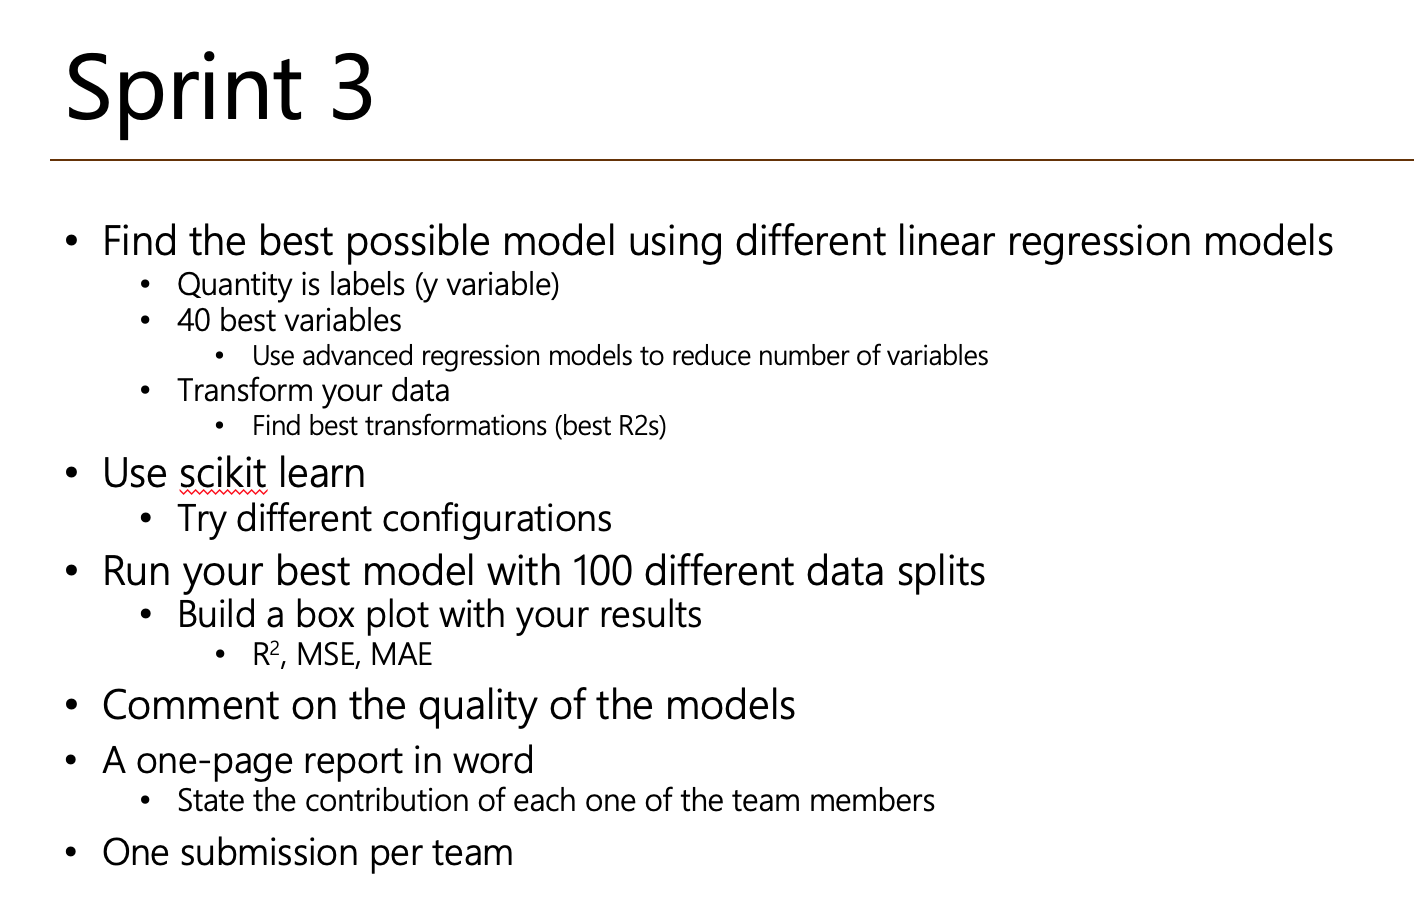

# Libraries

In [ ]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn import metrics
from sklearn import preprocessing 

# Data

In [ ]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,1/1/17,1.503548,0.699923,112579.4297,11303,1185131,3587,7716,229478,955653,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044530e+11,1.323490e+11,1.727680e+11,1.050910e+11,8.847567e+10,8.354725e+10,50084436328,9.372000e+10,30371154877,31360154924,1.585430e+11,1.050760e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2/1/17,0.076213,0.316156,113438.0949,16187,1590979,4659,11528,272961,1318018,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574850e+11,8.351517e+10,1.096910e+11,8.252536e+10,8.582517e+10,1.522090e+11,50567057384,6.034851e+10,21382430962,22163642219,2.104630e+11,1.036180e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


We need a seperate dataframe of just the date column ( to JOIN to the scaled data. One cannot scale DATES ( we could convert the dates to numeric but this will get the job done too))


In [ ]:
date_column = data[['date']]
date_column.head()

,date
0,1/1/17
1,2/1/17
2,3/1/17
3,4/1/17
4,5/1/17


Now we move the date column back to index position


In [ ]:
data.set_index('date',inplace=True) 
data.head(3)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/1/17,1.503548,0.699923,112579.4297,11303,1185131,3587,7716,229478,955653,897063.518,913190.407,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044530e+11,1.323490e+11,1.727680e+11,1.050910e+11,8.847567e+10,8.354725e+10,50084436328,9.372000e+10,30371154877,31360154924,1.585430e+11,1.050760e+12,104.851013,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
2/1/17,0.076213,0.316156,113438.0949,16187,1590979,4659,11528,272961,1318018,1025704.960,1007968.299,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574850e+11,8.351517e+10,1.096910e+11,8.252536e+10,8.582517e+10,1.522090e+11,50567057384,6.034851e+10,21382430962,22163642219,2.104630e+11,1.036180e+12,98.287453,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
3/1/17,-1.346258,-0.267695,114667.2587,15231,1438528,5687,9544,354904,1083624,1099919.669,1083268.231,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.568,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215370e+11,9.821204e+10,1.191500e+11,9.035507e+10,9.516119e+10,1.388750e+11,52669677767,1.137230e+11,28723642312,22588768481,1.192190e+11,1.000210e+12,94.447377,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,

Now we scale the data.

We might, if Time allows, try multiple versions of scaling but we will begin with the ***L2*** version which the prof on one of his slides seemed to indicate was the standard

In a complete lack of confidence I will start a new dataset to isolate this one 

In [ ]:
L2_data = data
L2_data.head(1)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/1/17,1.503548,0.699923,112579.4297,11303,1185131,3587,7716,229478,955653,897063.518,913190.407,194276.02,502084.833,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044530e+11,1.323490e+11,1.727680e+11,1.050910e+11,8.847567e+10,8.354725e+10,50084436328,9.372000e+10,30371154877,31360154924,1.585430e+11,1.050760e+12,104.851013,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.0,460632.0,5702443.0,4657354.0,7012296.0,3283417.0,549789.0,1454672.0,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.329,1093819.181,1,5,25


Scale the  data using "L2" which is actually not a scaler on its own  but setting/parameter of the **PrePreocesing.Normalize** scaler

In [ ]:
L2_data_scaled = preprocessing.normalize(L2_data, axis=0, norm='l2')

Unfortuately the scaler returns an array with no col headings

In [ ]:
L2_data_scaled

array([[ 0.20479264,  0.09389428,  0.10911878, ...,  0.02956562,
         0.15541747,  0.14264769],
       [ 0.01038075,  0.0424121 ,  0.10995105, ...,  0.        ,
         0.12433397,  0.13694178],
       [-0.1833688 , -0.03591114,  0.11114243, ...,  0.02956562,
         0.12433397,  0.1483536 ],
       ...,
       [ 0.10874844, -0.32462413,  0.15634762, ...,  0.05913124,
         0.12433397,  0.13694178],
       [-0.0684973 , -0.086422  ,  0.15638466, ...,  0.05913124,
         0.15541747,  0.13694178],
       [ 0.19288267, -0.12589136,  0.15765975, ...,  0.05913124,
         0.12433397,  0.13694178]])

But we can restore this array to a nice orderly pandas df with col headings.

In [ ]:
#restore scaled data matrisx to DF and apply headings
L2_data_scaledL2 = pd.DataFrame(L2_data_scaled, columns = L2_data.columns)

In [ ]:
L2_data_scaledL2.head(10)

,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,Construction_lic_area/unt,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187055,0.090461,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,0.156337,...,0.095960,0.135482,0.101378,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648
1,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118326,0.146551,...,0.141723,0.167819,0.129972,0.225984,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942
2,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114218,0.140825,...,0.088908,0.132430,0.103062,0.159742,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354
3,-0.289109,-0.324624,0.111840,0.121269,0.124850,0.106973,0.129308,0.115817,0.125976,0.126702,0.121463,0.128126,0.119217,0.127088,0.093568,0.195590,0.151301,0.132767,0.186339,0.119106,0.112837,0.121317,0.132391,-0.100605,-0.124503,-0.067951,0.098427,0.114963,0.137994,0.134583,0.094666,0.111585,0.071528,0.116148,0.151498,0.125595,0.074393,0.09394

Bummer about the date column . but we can JOIN L2_data_scaledL2 with the df of just the date we meade up top

In [ ]:
data_scaled_dated = pd.concat([date_column,  L2_data_scaledL2] , axis = 1, join ='outer')
 
data_scaled_dated.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,1/1/17,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187055,0.090461,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,...,0.095960,0.135482,0.101378,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648
1,2/1/17,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118326,...,0.141723,0.167819,0.129972,0.225984,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942
2,3/1/17,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114218,...,0.088908,0.132430,0.103062,0.159742,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354


Now we will add columns related to date: Year, month, Month_Year

In [ ]:
data_scaled_dated['date'] = pd.to_datetime(data_scaled_dated['date'])

Now let us strip out year from Date

In [ ]:
# add a column for Year
data_scaled_dated['Year'] = data_scaled_dated['date'].dt.year

Next extract the month

In [ ]:
#df['month'] = pd.DatetimeIndex(df['ArrivalDate']).month
data_scaled_dated['month'] =pd.DatetimeIndex(data_scaled_dated['date']).month

Now create a col for Month_Year

In [ ]:
data_scaled_dated['Year_Month'] = data_scaled_dated['date'].dt.strftime('%Y-%m')

In [ ]:
data_scaled_dated.head()

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Year,month,Year_Month
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187055,0.090461,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,...,0.183724,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648,2017,1,2017-01
1,2017-02-01,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118326,...,0.225984,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942,2017,2,2017-02
2,2017-03-01,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114218,...,0.159742,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354,2017,3,2017-03
3,2017-04-01,-0.289109,-0.324624,0.111840,0.121269,0.124850,0.106973,0.129308,0.115817,0.125976,0.126702,0.121463,0.128126,0.119217,0.127088,0.093568,0.195590,0.151301,0.132767,0.186339,0.119106,0.112837,0.121317,0.132391,-0.100605,-0.124503,-0.067951,0.098427,0.114963,0.137994,0.134583,0.094666,0.111585,0.071528,0.116148,0.151498,0.125595,0.074393,0.093948,0.112430,...,0.262288,0.124595,0.092785,0.115253,0.111566,0.089114,0.131320,0.1

Here is barplot of each month's Quantity sold

Gabriel can you perform your Plotly magic on this?

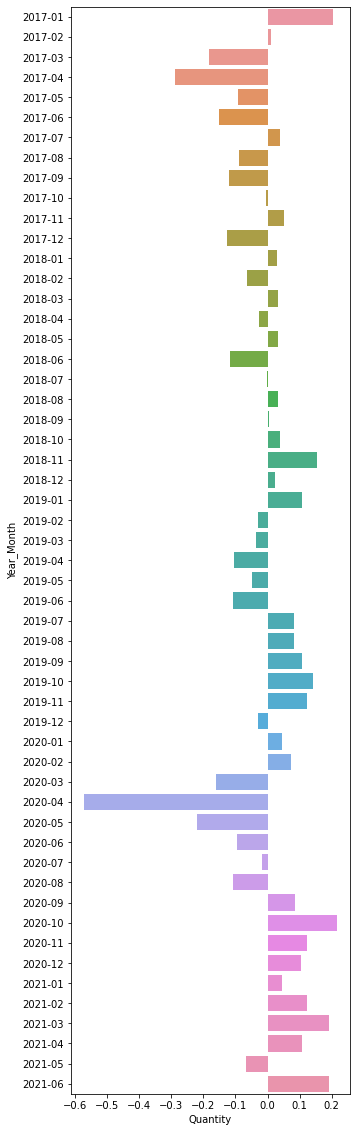

In [ ]:
plt.figure(figsize=(5,20))
sns.barplot( x= 'Quantity', y= 'Year_Month', data = data_scaled_dated,orient='h')

Next we will add a new column that has 0's for every month except April 2020.

Barplot comparing Quantity

While other months were impacted by covid only April 2020 was without precedent.

We will create a new column entitled "covid" and fill it with zeros except at April 2020 wher ewe will place a "1" there.

Add a dummy variable for covid . 0 = no , 1 = yes, .

I am eyeballing this. Is Neg o.4 the number that we want?

In [ ]:
data_scaled_dated['covid'] = np.where(data_scaled_dated['Quantity']< -0.4, '1', '0')
data_scaled_dated.head(3)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day,Year,month,Year_Month,covid
0,2017-01-01,0.204793,0.093894,0.109119,0.097262,0.113074,0.065817,0.120748,0.067358,0.131719,0.116346,0.123243,0.121072,0.125260,0.121865,0.112554,0.207870,0.149002,0.131805,0.218729,0.122053,0.119379,0.129875,0.131833,-0.237364,-0.323252,-0.143261,0.129649,0.114299,0.146104,0.187055,0.090461,0.111242,0.064448,0.109396,0.114950,0.150023,0.190661,0.119756,0.119991,...,0.097423,0.103831,0.124284,0.117152,0.100758,0.147144,0.098815,0.181191,0.109233,0.110567,0.144648,0.150413,0.133275,0.168969,0.115924,0.205492,0.122779,0.091004,0.119026,0.133278,0.133145,0.137483,0.091173,0.155828,0.097943,0.069722,0.105199,0.099867,0.103962,0.122977,0.092623,0.150611,0.082893,0.029566,0.155417,0.142648,2017,1,2017-01,0
1,2017-02-01,0.010381,0.042412,0.109951,0.139288,0.151797,0.085487,0.180402,0.080122,0.181664,0.133030,0.136034,0.142313,0.132430,0.141877,0.121955,0.203078,0.149002,0.131805,0.207133,0.119443,0.122147,0.132827,0.132308,-0.190992,-0.227304,-0.134172,0.116069,0.172331,0.092195,0.118762,0.071037,0.107910,0.117413,0.110450,0.074019,0.105621,0.134749,0.158974,0.118326,...,0.139427,0.096587,0.117012,0.120278,0.096183,0.134347,0.102046,0.181551,0.097811,0.104715,0.125279,0.117251,0.101422,0.145557,0.099791,0.178652,0.109710,0.110555,0.144305,0.149680,0.132775,0.167659,0.116307,0.203835,0.122764,0.091294,0.119468,0.133425,0.133168,0.136903,0.091897,0.154742,0.098428,0.000000,0.124334,0.136942,2017,2,2017-02,0
2,2017-03-01,-0.183369,-0.035911,0.111142,0.131062,0.137251,0.104349,0.149354,0.104174,0.149358,0.142655,0.146196,0.150271,0.141816,0.155308,0.136871,0.199184,0.149002,0.131805,0.187539,0.122005,0.115353,0.124440,0.131336,-0.165840,-0.209028,-0.109934,0.107233,0.132994,0.108419,0.129003,0.077777,0.119648,0.107127,0.115042,0.139484,0.141884,0.137333,0.090052,0.114218,...,0.097445,0.120465,0.149865,0.162642,0.142051,0.166412,0.130828,0.223312,0.139982,0.097410,0.117949,0.120379,0.096817,0.132897,0.103055,0.179007,0.098238,0.104704,0.124981,0.116680,0.101041,0.144428,0.100121,0.177211,0.109696,0.110907,0.144840,0.149845,0.132798,0.166952,0.117230,0.202414,0.123372,0.029566,0.124334,0.148354,2017,3,2017-03,0


# Correlation

In [ ]:
#corr = total.corr()['Quantity'].sort_values(ascending=False)
corr = data_scaled_dated.corr()['Quantity'].sort_values(ascending=False)

In [ ]:
corr

Quantity                           1.000000
Gray_cement_dispatch_comercial     0.763691
Gray_cement_dispatch_other         0.749478
Gray_cement_dispatch               0.742108
Gray_cement_prod                   0.711097
                                     ...   
Construction_lic_unt_NO_SIlag_4   -0.453457
Construction_lic_arealag_4        -0.473548
Imports_quantitylag_4             -0.475870
Construction_lic_untlag_4         -0.480974
holiday                           -0.609440
Name: Quantity, Length: 944, dtype: float64

Convert *corr* to a dataframe

In [ ]:
corr_df = pd.DataFrame(corr)

In [ ]:
corr_df.head(2)

,Quantity
Quantity,1.000000
Gray_cement_dispatch_comercial,0.763691


In [ ]:
#df.reset_index(inplace = True, drop = True)
corr_df = corr_df.reset_index(inplace = False, drop = False)

In [ ]:
corr_df.head(2)

,index,Quantity
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691


Not precisely what we want but easy to fix

In [ ]:
corr_df.columns = ['Feature' , 'Correlation']
corr.head(2)

Quantity                          1.000000
Gray_cement_dispatch_comercial    0.763691
Name: Quantity, dtype: float64

In [ ]:
corr_df.head(2)

,Feature,Correlation
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691


Let us add a new column of ABSOLUTE correlation values

I think if you were to sort by Correlation v Absoulute score you would get the features ina different order.

In [ ]:
corr_df['Absolute_Score']= abs(corr_df['Correlation'])

In [ ]:
corr_df.head(5)

,Feature,Correlation,Absolute_Score
0,Quantity,1.000000,1.000000
1,Gray_cement_dispatch_comercial,0.763691,0.763691
2,Gray_cement_dispatch_other,0.749478,0.749478
3,Gray_cement_dispatch,0.742108,0.742108
4,Gray_cement_prod,0.711097,0.711097


In [ ]:
corr_df.tail(5)

,Feature,Correlation,Absolute_Score
939,Construction_lic_unt_NO_SIlag_4,-0.453457,0.453457
940,Construction_lic_arealag_4,-0.473548,0.473548
941,Imports_quantitylag_4,-0.475870,0.475870
942,Construction_lic_untlag_4,-0.480974,0.480974
943,holiday,-0.609440,0.609440


Below I remore redundancies.  There is a judgement call to be made here and maybe you guys want to play with it yourself .  

I made a new column from the first "n" characters of the Feature names (e.g. row 939 above would come is as :CONST .  

Then I kep one of eacha dn drop the others.  I am trying to get rid of the 101 features realated to cement.  Juan mentioned one can assume that if wonce cement wetn up others would as well.  I think it is called Co linearity.  Looks like 2 featres but might as well be one feature

Gabriel , can you Plotly the graph below as line graph?  And what about changing the order of the data so it is not decending but bell shaped?  And then flip it upside down like a smile?  Or would it be easier to take out your own kidney than do all of that?

In [ ]:
distinct_features = corr_df.assign(rep_feature = corr_df['Feature'].str[:6])

In [ ]:
len(distinct_features)

944

Next we drop the duplates found in the new column.

In [ ]:
distinct_feature_2 = distinct_features.drop_duplicates(subset=['rep_feature'])

In [ ]:
# YIKES
# Only 34 features left?

#I played around with how many letters to keep .config/that changes this number .
#Let me know what you guys think

len(distinct_feature_2)

34

In [ ]:
#corr_df.to_csv('corr_df.csv',index=False,header=True)
#distinct_feature_2.to_csv('distinct_feature_2.csv',index=False,header=True)

Gabriel can you "plotly" this?( and what about instead of\it being sorted from high to low could it be an upside down\bell curve, i.e., a smile?')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


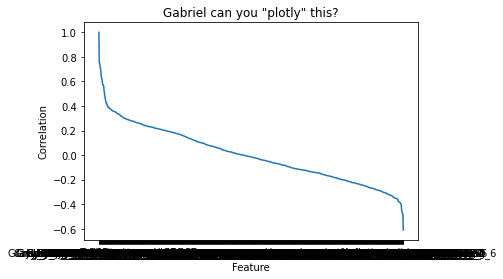

In [ ]:
sns.lineplot('Feature', 'Correlation' ,data = corr_df).set_title('Gabriel can you "plotly" this?')
plt.show()

I think all you need to proceed is this file.  

Perhaps I am overlooking the huge and obvious thing.

**TURNS OUT I WAS!**

I need to weed out the redundancies

In [ ]:
#corr_df.to_csv('corr_df.csv',index=False,header=True)

Here are the Top 40 from the ABOSLUTE Column

In [ ]:
top_40 = corr_df.nlargest(40,'Absolute_Score')

Export top 40 as. astand alone csv

In [ ]:
top_40.to_csv('absolute_top_40.csv',index=False,header=True)

### I  would REALLY like to get one of the automate feature selectors to work. PCA  , which it turns out I do not think works for supervised datasets , does not just pick out the best it syntheseis many , like hundreds ,a nd cretes its own features.  

### I will keep trying but I may not figure it out but in the meantime we can proceesd with thes featres

Now we are ready to investigate whic features we should expect to have the most predictive powers. Let us try PCA

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

# The Three Regression Techniques

# Linear Regression: Gabriel

SKLearn has something called CROSS VALIDATION STRATIFIED SPLIT. Instead of just splitting the data one time at 80/20 it splits it 1000s of times until every possible combination of data has been tested. Then it reports the average of all of that.

If our data was vast and uniform it would not offer us much but our data is both sparse, what do we have 64 observations, and VERY uneven. We even have a once ina 100 years pandemeic mixed in.

Without reshiffling the data an infinit number of times depending on where the covid data landed in either training or testing, it would probably result in big differences in our model.

Fingers crossed we can figure out how to employ it our our repsective regressin methods. First person to figure it please show the rest of us.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
# regress_technique_1 = data
#(Let us isolate each of regress techniques by renaming the data for each purpoase.)

#each technique may need itsown scaling technique and how to deal wit covid

# Ridge Regression: Brian

SKLearn has something called CROSS VALIDATION STRATIFIED SPLIT. Instead of just splitting the data one time at 80/20 it splits it 1000s of times until every possible combination of data has been tested. Then it reports the average of all of that.

If our data was vast and uniform it would not offer us much but our data is both sparse, what do we have 64 observations, and VERY uneven. We even have a once ina 100 years pandemeic mixed in.

Without reshiffling the data an infinit number of times depending on where the covid data landed in either training or testing, it would probably result in big differences in our model.

Fingers crossed we can figure out how to employ it our our repsective regressin methods. First person to figure it please show the rest of us.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://scikit-learn.org/stable/modules/cross_validation.html

NameError: ignored

NameError: ignored

In [ ]:
# regress_technique_1 = data
#(Let us isolate each of regress techniques by renaming the data for each purpoase.)

#each technique may need itsown scaling technique and how to deal wit covid

# Lasso Regression: Joe

SKLearn has something called ***CROSS VALIDATION STRATIFIED SPLIT***.  Instead of just splitting the data one time at 80/20 it splits it 1000s of times until every possible combination of data has been tested.  Then it reports the average of all of that.  

If our data was vast and uniform it would not offer us much but our data is both sparse, what do we have 64 observations, and VERY uneven.  We even have a once ina 100 years pandemeic mixed in.  

Without reshiffling the data an infinit number of times depending on where the covid data landed in either training or testing, it would probably result in big differences in our model.  

Fingers crossed we can figure out how to employ it our our repsective regressin methods. First person to figure it please show the rest of us.  

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
# regress_technique_1 = data
#(Let us isolate each of regress techniques by renaming the data for each purpoase.)

#each technique may need itsown scaling technique and how to deal wit covid

## Since we are intersted in what correlates iwth Quantity let us take a look

# Libraries

In [1]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #Split data in testing and training
from sklearn import metrics
from sklearn import preprocessing
# use automatically configured the lasso regression algorithm
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
import datetime as dt

# Data

In [3]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


Since we are intersted in what correlates iwth Quantity let us take a look

In [4]:
#Correlation reduncancies
corr = data.corr()['Quantity'].sort_values(ascending=False)

almost identical names showing up over and over


In [ ]:
corr.head(20)

Here is a barplot of  Quatity sold

Note that whiele the periods surrounding April 2020 were not great , they are  not without precedent. April 2020 is a Black Swan event, not Teh Second Coming

In [6]:
data['date'] = pd.to_datetime(data['date'])

In [7]:
# add year_month
data['Year_Month'] = data['date'].dt.strftime('%Y-%m')

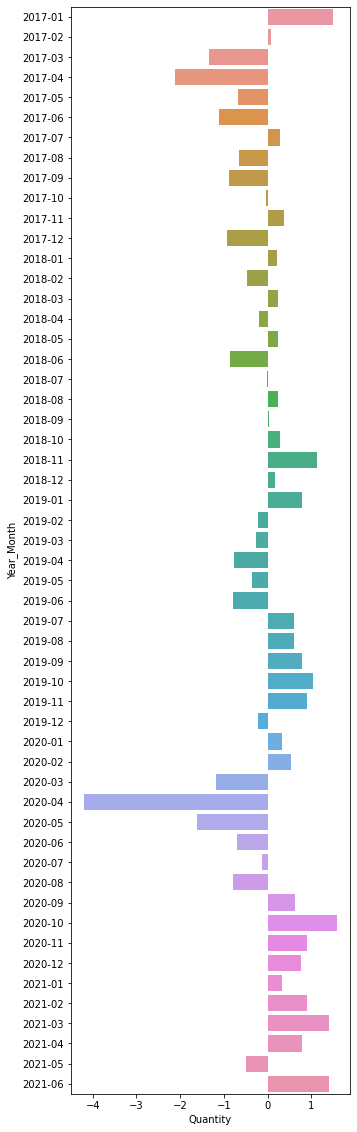

In [8]:
plt.figure(figsize=(5,20))
sns.barplot( x= 'Quantity', y= 'Year_Month', data = data,orient='h')

An obvious problem arises when we look at ***corr***.

Too many similar/redundant Features.

To remove the redundancies we will extract the first 'n' letters from the feature name and store them in a new column. Then we will drop duplicates in that column.

Convert ***corr*** to a DF.

In [10]:
corr_df = pd.DataFrame(corr)
#corr

In [11]:
#df.reset_index(inplace = True, drop = True)
corr_df = corr_df.reset_index(inplace = False, drop = False)
corr_df

,index,Quantity
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691
2,Gray_cement_dispatch_other,0.749478
3,Gray_cement_dispatch,0.742108
4,Gray_cement_prod,0.711097
...,...,...
937,Construction_lic_unt_NO_SIlag_4,-0.453457
938,Construction_lic_arealag_4,-0.473548
939,Imports_quantitylag_4,-0.475870
940,Construction_lic_untlag_4,-0.480974


Not precisely what we want but easy to fix

In [12]:
corr_df.columns = ['Feature' , 'Correlation']
corr_df.head(10)

,Feature,Correlation
0,Quantity,1.000000
1,Gray_cement_dispatch_comercial,0.763691
2,Gray_cement_dispatch_other,0.749478
3,Gray_cement_dispatch,0.742108
4,Gray_cement_prod,0.711097
5,Housing_total_sales,0.706916
6,ISE,0.687654
7,Housing_total_sales_SI,0.641345
8,working_day,0.637156
9,Consumer_microcredit,0.617899


Let us add a new column of ABSOLUTE correlation values

In [13]:
corr_df['Absolute_Score']= abs(corr_df['Correlation']).sort_values(ascending=False)
corr_df

,Feature,Correlation,Absolute_Score
0,Quantity,1.000000,1.000000
1,Gray_cement_dispatch_comercial,0.763691,0.763691
2,Gray_cement_dispatch_other,0.749478,0.749478
3,Gray_cement_dispatch,0.742108,0.742108
4,Gray_cement_prod,0.711097,0.711097
...,...,...,...
937,Construction_lic_unt_NO_SIlag_4,-0.453457,0.453457
938,Construction_lic_arealag_4,-0.473548,0.473548
939,Imports_quantitylag_4,-0.475870,0.475870
940,Construction_lic_untlag_4,-0.480974,0.480974


In [14]:
# We extract the first 7 characters.
# We triued various numbers .
# None were thoroughly satisfacrtory just some were less unsatisfactory.
distinct_features = corr_df.assign(rep_feature = corr_df['Feature'].str[:7])

In [16]:
distinct_features.head(3)

,Feature,Correlation,Absolute_Score,rep_feature
0,Quantity,1.000000,1.000000,Quantit
1,Gray_cement_dispatch_comercial,0.763691,0.763691,Gray_ce
2,Gray_cement_dispatch_other,0.749478,0.749478,Gray_ce


Drop dupes

In [17]:
distinct_feature_2 = distinct_features.drop_duplicates(subset=['rep_feature'])

In [18]:
distinct_feature_2.head()

,Feature,Correlation,Absolute_Score,rep_feature
0,Quantity,1.000000,1.000000,Quantit
1,Gray_cement_dispatch_comercial,0.763691,0.763691,Gray_ce
5,Housing_total_sales,0.706916,0.706916,Housing
6,ISE,0.687654,0.687654,ISE
8,working_day,0.637156,0.637156,working


Never mind hte mess.  The line probably conatains all the info we want to know.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


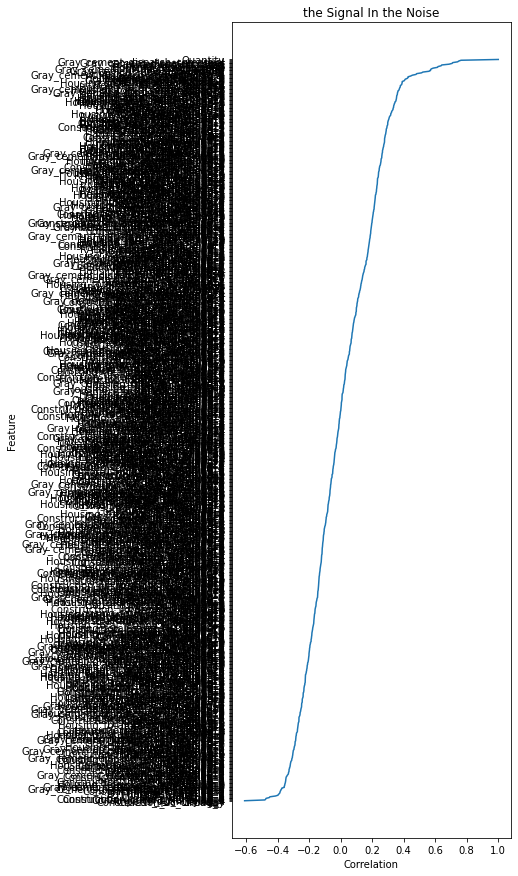

In [19]:
plt.figure(figsize=(5,15))
graph = sns.lineplot('Correlation','Feature' ,data = corr_df).set_title('the Signal In the Noise')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


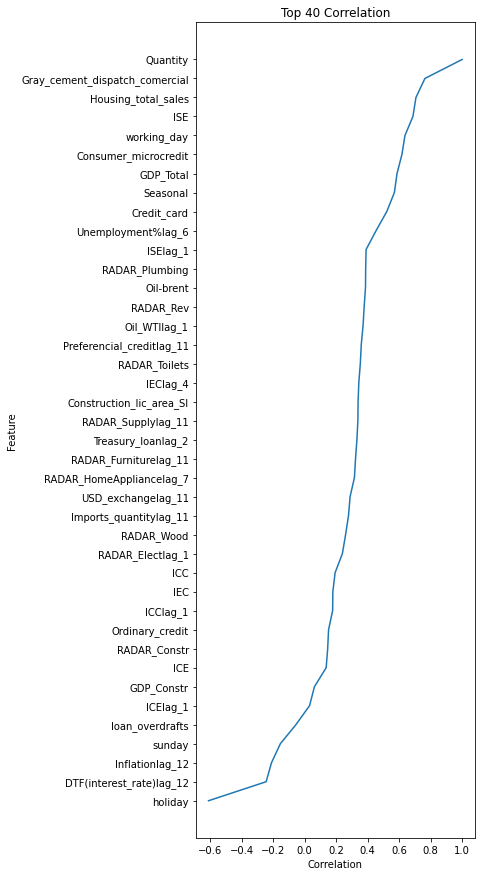

In [21]:
plt.figure(figsize=(5,15))
graph = sns.lineplot('Correlation','Feature' ,data = distinct_feature_2).set_title('Top 40 Correlation')
plt.show()

# These Are the 40 Features we will plug into Lasso

*We know this is the most tedius method to subset the Features.  We transposed the oridginal data so the Header row became a column and then tried to do a  filter join against the Top 40  but alas...*

In [23]:
data_2 = data

In [ ]:
top_40_select_cols = data_2[['date','Quantity','Gray_cement_dispatch_comercial','Housing_total_sales','ISE', 'working_day',
                             'Consumer_microcredit', 'GDP_Total','Seasonal','Credit_card','Unemployment%lag_6',
                             'ISElag_1','RADAR_Plumbing','Oil-brent','RADAR_Rev','Preferencial_creditlag_11',
                             'RADAR_Toilets','IEClag_4','Construction_lic_area_SI','RADAR_Supplylag_11',
                             'RADAR_Supplylag_11','Treasury_loanlag_2','RADAR_Furniturelag_11', 'RADAR_HomeAppliancelag_7',
                             'USD_exchangelag_11', 'Imports_quantitylag_11','RADAR_Wood','RADAR_Electlag_1', 'ICC',
                             'IEC','ICClag_1','Ordinary_credit','RADAR_Constr','ICE' ,'GDP_Constr','ICElag_1',
                             'loan_overdrafts','sunday','Inflationlag_12', 'DTF(interest_rate)lag_12','holiday']]
top_40_select_cols 

In [25]:
top_40_select_cols .head(3)

,date,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,2017-01-01,1.503548,502084.8330,17168.0,102.548972,25,331812.3476,206242.568,0.699923,3370234.662,9.845308,103.278437,3.037115e+10,52.19,1.323489e+11,6137144.374,1.727682e+11,-0.5,229478.0,1.544220e+11,1.544220e+11,502571.7271,1.143908e+11,1.038753e+11,3357.50,72648.0,3.136015e+10,9.434221e+10,-30.2,-28.3,-10.7,4498496.510,1.044525e+11,-33.1,14753.34784,-2.6,5515276.146,5,7.45,0.0574,1
1,2017-02-01,0.076213,530826.1625,16196.0,102.919033,24,451305.4187,206242.568,0.316156,3469317.755,8.988420,102.548972,2.138243e+10,53.40,8.351517e+10,6120086.089,1.096908e+11,-4.2,272961.0,1.070383e+11,1.070383e+11,447966.3574,1.664735e+11,8.970825e+10,3145.26,44016.0,2.216364e+10,9.372000e+10,-24.3,-19.9,-30.2,7087850.705,1.574855e+11,-31.0,14753.34784,-33.1,6331676.215,4,7.59,0.0625,0
2,2017-03-01,-1.346258,568447.4880,15388.0,102.162670,26,570278.7259,206242.568,-0.267695,4411360.214,8.507884,102.919033,2.872364e+10,50.43,9.821204e+10,4657354.000,1.191497e+11,-4.7,354904.0,2.416563e+11,2.416563e+11,225521.4428,4.662799e+10,8.686514e+10,2998.71,25876.0,2.258877e+10,6.034851e+10,-21.1,-18.3,-24.3,7736718.499,1.215372e+11,-25.4,14753.34784,-31.0,8189116.436,4,7.98,0.0635,1


SKLearn cannot deal with Date type data so we will convert it to ordinal. We chose ordinal becasue one date influences the next.  We think that if we scrambled then order h the results might not be the same.

In [26]:
#Make date ordinal
import datetime as dt
top_40_select_cols['date'] = pd.to_datetime(top_40_select_cols['date'])
top_40_select_cols['date']=top_40_select_cols['date'].map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Convert to DF

In [28]:
top_40_select_cols_df = pd.DataFrame(data =top_40_select_cols)

In [29]:
X= top_40_select_cols_df.loc[:, top_40_select_cols_df.columns != 'Quantity']
X.head(3)

,date,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,736330,502084.8330,17168.0,102.548972,25,331812.3476,206242.568,0.699923,3370234.662,9.845308,103.278437,3.037115e+10,52.19,1.323489e+11,6137144.374,1.727682e+11,-0.5,229478.0,1.544220e+11,1.544220e+11,502571.7271,1.143908e+11,1.038753e+11,3357.50,72648.0,3.136015e+10,9.434221e+10,-30.2,-28.3,-10.7,4498496.510,1.044525e+11,-33.1,14753.34784,-2.6,5515276.146,5,7.45,0.0574,1
1,736361,530826.1625,16196.0,102.919033,24,451305.4187,206242.568,0.316156,3469317.755,8.988420,102.548972,2.138243e+10,53.40,8.351517e+10,6120086.089,1.096908e+11,-4.2,272961.0,1.070383e+11,1.070383e+11,447966.3574,1.664735e+11,8.970825e+10,3145.26,44016.0,2.216364e+10,9.372000e+10,-24.3,-19.9,-30.2,7087850.705,1.574855e+11,-31.0,14753.34784,-33.1,6331676.215,4,7.59,0.0625,0
2,736389,568447.4880,15388.0,102.162670,26,570278.7259,206242.568,-0.267695,4411360.214,8.507884,102.919033,2.872364e+10,50.43,9.821204e+10,4657354.000,1.191497e+11,-4.7,354904.0,2.416563e+11,2.416563e+11,225521.4428,4.662799e+10,8.686514e+10,2998.71,25876.0,2.258877e+10,6.034851e+10,-21.1,-18.3,-24.3,7736718.499,1.215372e+11,-25.4,14753.34784,-31.0,8189116.436,4,7.98,0.0635,1


In [30]:
y = top_40_select_cols_df.iloc[:,1]  # <- Quantity isolated
y.head(3)

0    1.503548
1    0.076213
2   -1.346258
Name: Quantity, dtype: float64

In [31]:
top_40_select_cols_df.head(3)

,date,Quantity,Gray_cement_dispatch_comercial,Housing_total_sales,ISE,working_day,Consumer_microcredit,GDP_Total,Seasonal,Credit_card,Unemployment%lag_6,ISElag_1,RADAR_Plumbing,Oil-brent,RADAR_Rev,Preferencial_creditlag_11,RADAR_Toilets,IEClag_4,Construction_lic_area_SI,RADAR_Supplylag_11,RADAR_Supplylag_11,Treasury_loanlag_2,RADAR_Furniturelag_11,RADAR_HomeAppliancelag_7,USD_exchangelag_11,Imports_quantitylag_11,RADAR_Wood,RADAR_Electlag_1,ICC,IEC,ICClag_1,Ordinary_credit,RADAR_Constr,ICE,GDP_Constr,ICElag_1,loan_overdrafts,sunday,Inflationlag_12,DTF(interest_rate)lag_12,holiday
0,736330,1.503548,502084.8330,17168.0,102.548972,25,331812.3476,206242.568,0.699923,3370234.662,9.845308,103.278437,3.037115e+10,52.19,1.323489e+11,6137144.374,1.727682e+11,-0.5,229478.0,1.544220e+11,1.544220e+11,502571.7271,1.143908e+11,1.038753e+11,3357.50,72648.0,3.136015e+10,9.434221e+10,-30.2,-28.3,-10.7,4498496.510,1.044525e+11,-33.1,14753.34784,-2.6,5515276.146,5,7.45,0.0574,1
1,736361,0.076213,530826.1625,16196.0,102.919033,24,451305.4187,206242.568,0.316156,3469317.755,8.988420,102.548972,2.138243e+10,53.40,8.351517e+10,6120086.089,1.096908e+11,-4.2,272961.0,1.070383e+11,1.070383e+11,447966.3574,1.664735e+11,8.970825e+10,3145.26,44016.0,2.216364e+10,9.372000e+10,-24.3,-19.9,-30.2,7087850.705,1.574855e+11,-31.0,14753.34784,-33.1,6331676.215,4,7.59,0.0625,0
2,736389,-1.346258,568447.4880,15388.0,102.162670,26,570278.7259,206242.568,-0.267695,4411360.214,8.507884,102.919033,2.872364e+10,50.43,9.821204e+10,4657354.000,1.191497e+11,-4.7,354904.0,2.416563e+11,2.416563e+11,225521.4428,4.662799e+10,8.686514e+10,2998.71,25876.0,2.258877e+10,6.034851e+10,-21.1,-18.3,-24.3,7736718.499,1.215372e+11,-25.4,14753.34784,-31.0,8189116.436,4,7.98,0.0635,1


## L1 Scale data here

In [32]:
L2_data = top_40_select_cols_df

In [33]:
L2_data_scaled = preprocessing.normalize(L2_data, axis=0, norm='l2')

In [37]:
data = L2_data_scaled

In [ ]:
X

In [ ]:
y

In [38]:
data

array([[ 0.13593402,  0.20479264,  0.12525979, ...,  0.20975787,
         0.14294763,  0.02956562],
       [ 0.13593975,  0.01038075,  0.13243016, ...,  0.21369963,
         0.15564855,  0.        ],
       [ 0.13594492, -0.1833688 ,  0.1418159 , ...,  0.22468024,
         0.15813893,  0.02956562],
       ...,
       [ 0.13622036,  0.10874844,  0.14882193, ...,  0.09882552,
         0.11331214,  0.05913124],
       [ 0.13622589, -0.0684973 ,  0.11027595, ...,  0.08024294,
         0.10683716,  0.05913124],
       [ 0.13623162,  0.19288267,  0.15190741, ...,  0.06166037,
         0.09363817,  0.05913124]])

In [39]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [40]:
# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs= -1)

In [ ]:
# fit model
model.fit(X, y)

# All of the coeffecients

In [42]:
# All coeffecients

def get_coefficients(model,X):

    predictors_model = pd.DataFrame({'label':X.columns,'coeff':model.coef_})
    return predictors_model

get_coefficients(model,X)

,label,coeff
0,date,-5.946640e-04
1,Gray_cement_dispatch_comercial,4.505258e-06
2,Housing_total_sales,7.321176e-05
3,ISE,-0.000000e+00
4,working_day,0.000000e+00
5,Consumer_microcredit,2.466677e-06
6,GDP_Total,4.377038e-06
7,Seasonal,1.601831e-01
8,Credit_card,3.475831e-07
9,Unemployment%lag_6,9.292205e-03
